            CLASSIFICATION PROJECT: CUSTOMER CHURNING DATA ANALYSIS 

In [1]:
# IMPORTING LIBRARIES AND PACKAGES 

import urllib
from sqlalchemy import create_engine, text
import pandas as pd
%pip install openpyxl

# Suppressing all warnings 
from warnings import filterwarnings
filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.


LOADING OF FIRST DATASET BY CREATING A CONNECTION ENGINE TO SQL DATABASE USING CREDENTIALS.                                                      THIS DATASET WILL BE USED FOR TRAINING OF MODEL


In [2]:

# Database connection details
server = 'dap-projects-database.database.windows.net'
database = 'dapDB'
username = 'LP2_project'
password = 'Stat$AndD@t@Rul3'
driver = '{ODBC Driver 17 for SQL Server}'

# Create connection string
connection_string = f"mssql+pyodbc:///?odbc_connect=" + urllib.parse.quote_plus(
    f"DRIVER={driver};"
    f"SERVER={server};"
    f"DATABASE={database};"
    f"UID={username};"
    f"PWD={password};"
)

# Create engine
engine = create_engine(connection_string)

# Test query using SQLAlchemy's text method
try:
    with engine.connect() as connection:
        query = text("SELECT * FROM dbo.LP2_Telco_churn_first_3000")
        train_data1 = connection.execute(query)
        
        # Convert result to a pandas DataFrame
        train_data1 = pd.DataFrame(train_data1.fetchall(), columns=train_data1.keys())
        display(train_data1)  # Display the dataframe
except Exception as e:
    print(f"Error executing query: {e}")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2209-XADXF,Female,False,False,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,False,Bank transfer (automatic),25.250000,25.250000,False
2996,6620-JDYNW,Female,False,False,False,18,True,True,DSL,True,...,True,False,False,False,Month-to-month,True,Mailed check,60.599998,1156.349976,False
2997,1891-FZYSA,Male,True,True,False,69,True,True,Fiber optic,False,...,False,False,True,False,Month-to-month,True,Electronic check,89.949997,6143.149902,True
2998,4770-UEZOX,Male,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,74.750000,144.800003,False


LOADING SECOND DATASET (CSV FILE) FOR THE TRAINING OF MODEL

In [3]:
# LOADING SECOND DATASET AS CSV
train_data2 = pd.read_csv(r"C:\Users\HP1\Documents\DATASET FOR PHASE2 PROJECT\LP2_Telco-churn-second-2000.csv")
train_data2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
2040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
2041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


LOADING THIRD DATASET (EXCEL FILE) FOR TESTING OF MODEL

In [4]:
# LOADING TESTING DATASET AS XLSX
test_data = pd.read_excel(r"C:\Users\HP1\Documents\DATASET FOR PHASE2 PROJECT\Telco-churn-last-2000.xlsx.aspx")
test_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7912-SYRQT,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95
1996,3557-HTYWR,Female,0,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.3
1997,4816-JBHOV,Male,1,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.7
1998,8920-NAVAY,Male,1,No,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35


PERFORMING EXPLORATIVE DATA ANALYSIS TO VERIFY AND CLEAN DATA OF ERRORS 


1.1


In [5]:
# Viewing the various columns in the train_data1 dataframe
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [6]:
# Checking for null values in train_data1
train_data1.isnull().sum()


customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [7]:
# Checking the percentage of missing values in train_data1
train_data1.isnull().sum()/len(train_data1)*100

customerID           0.000000
gender               0.000000
SeniorCitizen        0.000000
Partner              0.000000
Dependents           0.000000
tenure               0.000000
PhoneService         0.000000
MultipleLines        8.966667
InternetService      0.000000
OnlineSecurity      21.700000
OnlineBackup        21.700000
DeviceProtection    21.700000
TechSupport         21.700000
StreamingTV         21.700000
StreamingMovies     21.700000
Contract             0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
MonthlyCharges       0.000000
TotalCharges         0.166667
Churn                0.033333
dtype: float64

In [8]:
# Checking for duplicates in train_data1
train_data1.duplicated().sum()

np.int64(0)

In [9]:
# Checking info about train_data2
train_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [10]:
#Univariate Analysis of train_data1
train_data1.describe()

,tenure,MonthlyCharges,TotalCharges
count,3000.000000,3000.000000,2995.000000
mean,32.527333,65.347400,2301.278315
std,24.637768,30.137053,2274.987884
min,0.000000,18.400000,18.799999
25%,9.000000,35.787499,415.250000
50%,29.000000,70.900002,1404.650024
75%,56.000000,90.262501,3868.725098
max,72.000000,118.650002,8564.750000


In [11]:
# Concatenate the train_data1 and train_data2 as a list ignoring index
train_data = pd.concat([train_data1, train_data2], ignore_index=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [12]:
# Viewing the shape of train_data
train_data.shape

(5043, 21)

In [13]:
#converting the data type for TotalCharges on both train_data and test_data
train_data['TotalCharges'] =pd.to_numeric( train_data['TotalCharges'],errors='coerce')
test_data['TotalCharges'] =pd.to_numeric( test_data['TotalCharges'],errors='coerce')


In [14]:
train_data.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 1
dtype: int64

In [15]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [16]:
train_data.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 1
dtype: int64

OBERVATION


In [17]:
#Impute the missing values
#Drop the ones with the less missing values
#Check for outliers and standardize the data

In [18]:
#CHECK FOR UNIQUE VALUES    
# def unique_values(df): 
    
#     unique_summary = [] 

#     for columns in df.columns:
#         values = df[columns].unique()
#         count_values = len(values)

#         unique_summary.append([
#             "columns" : column,
#              "Unique_Values" : values,
#               "Count_of_Unique_Values" : count_values,])
#     usummary = pd.DataFrame(unique_summary)

#     return usummary

def unique_values(df): 
    unique_summary = []  # List to store summary for each column

    for column in df.columns:  # Loop through each column
        values = df[column].unique()  # Get unique values for the column
        count_values = len(values)  # Count the number of unique values

        # Append the summary as a dictionary
        unique_summary.append({
            "Column": column,
            "Unique_Values": values,
            "Count_of_Unique_Values": count_values
        })

    # Convert the list of dictionaries to a DataFrame for better display
    usummary = pd.DataFrame(unique_summary)

    return usummary


In [19]:
unique_values(train_data)

,Column,Unique_Values,Count_of_Unique_Values
0,customerID,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",5043
1,gender,"[Female, Male]",2
2,SeniorCitizen,"[0, 1]",2
3,Partner,"[True, False, No, Yes]",4
4,Dependents,"[False, True, No, Yes]",4
5,tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",73
6,PhoneService,"[False, True, Yes, No]",4
7,MultipleLines,"[None, False, True, No, No phone service, Yes]",6
8,InternetService,"[DSL, Fiber optic, No]",3
9,OnlineSecurity,"[False, True, None, No, Yes, No internet service]",6


In [20]:
# dropping the customerID column in the train_data
train_data.drop(columns = 'customerID', inplace=True)

# dropping the customerID column in the test_data
test_data.drop(columns = 'customerID', inplace=True)


In [21]:
train_data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,Male,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,Male,0,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,Male,0,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,Female,0,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [22]:
#Converting to Yes and No

labels = train_data.select_dtypes(include=['object']).columns.tolist()
labels

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [23]:
# Convert to String

train_data[labels] = train_data[labels].astype(str)

In [24]:
# Adding a funtion to make the changes

change = {
    
    "No" : ["False", "0", "No phone service", "No internet service"],
    "Yes" : ["True","1"]
}

def correct_columns(train_data,labels,change):
    for columns_name in labels:
        for key,values in change.items():
            train_data[columns_name] = train_data[columns_name].replace(values, key)
    return train_data

train_data = correct_columns(train_data,labels,change)

In [25]:
# Verifying the changes
unique_values(train_data)

,Column,Unique_Values,Count_of_Unique_Values
0,gender,"[Female, Male]",2
1,SeniorCitizen,"[0, 1]",2
2,Partner,"[Yes, No]",2
3,Dependents,"[No, Yes]",2
4,tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",73
5,PhoneService,"[No, Yes]",2
6,MultipleLines,"[None, No, Yes]",3
7,InternetService,"[DSL, Fiber optic, No]",3
8,OnlineSecurity,"[No, Yes, None]",3
9,OnlineBackup,"[Yes, No, None]",3


In [26]:
# Creating a list for numeric columns
numeric = train_data[["tenure", "TotalCharges", "MonthlyCharges"]]
numeric

,tenure,TotalCharges,MonthlyCharges
0,1,29.850000,29.850000
1,34,1889.500000,56.950001
2,2,108.150002,53.849998
3,45,1840.750000,42.299999
4,2,151.649994,70.699997
...,...,...,...
5038,24,1990.500000,84.800000
5039,72,7362.900000,103.200000
5040,11,346.450000,29.600000
5041,4,306.600000,74.400000


In [27]:
train_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5043.000000,5043.000000,5043.000000,5035.000000
mean,0.162403,32.576641,65.090214,2302.062861
std,0.368857,24.529807,30.068133,2269.483576
min,0.000000,0.000000,18.400000,18.799999
25%,0.000000,9.000000,35.775000,417.675003
50%,0.000000,29.000000,70.550003,1401.150024
75%,0.000000,56.000000,90.050003,3862.000000
max,1.000000,72.000000,118.650002,8670.100000


In [28]:
# Checking info about train_data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   int64  
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     5043 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    5043 non-null   object 
 9   OnlineBackup      5043 non-null   object 
 10  DeviceProtection  5043 non-null   object 
 11  TechSupport       5043 non-null   object 
 12  StreamingTV       5043 non-null   object 
 13  StreamingMovies   5043 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 


In [29]:
# Checking for null values
train_data.isnull().sum()   

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

In [30]:
# Changing senirorCitizen to string
train_data['SeniorCitizen'] = train_data['SeniorCitizen'].astype(str)
test_data['SeniorCitizen'] = test_data['SeniorCitizen'].astype(str)

In [31]:
# Confirming SenorCitizen changes to String in the train_data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   object 
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     5043 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    5043 non-null   object 
 9   OnlineBackup      5043 non-null   object 
 10  DeviceProtection  5043 non-null   object 
 11  TechSupport       5043 non-null   object 
 12  StreamingTV       5043 non-null   object 
 13  StreamingMovies   5043 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 


In [32]:
# Changing Churn to Yes and No in the train_data
train_data.loc[2988, "Churn"] = "No"

In [33]:
train_data.loc[2988, "Churn"]

'No'

In [34]:
# Confirming SenorCitizen changes to String in the train_data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2000 non-null   object 
 1   SeniorCitizen     2000 non-null   object 
 2   Partner           2000 non-null   object 
 3   Dependents        2000 non-null   object 
 4   tenure            2000 non-null   int64  
 5   PhoneService      2000 non-null   object 
 6   MultipleLines     2000 non-null   object 
 7   InternetService   2000 non-null   object 
 8   OnlineSecurity    2000 non-null   object 
 9   OnlineBackup      2000 non-null   object 
 10  DeviceProtection  2000 non-null   object 
 11  TechSupport       2000 non-null   object 
 12  StreamingTV       2000 non-null   object 
 13  StreamingMovies   2000 non-null   object 
 14  Contract          2000 non-null   object 
 15  PaperlessBilling  2000 non-null   object 
 16  PaymentMethod     2000 non-null   object 


In [35]:
train_data.describe()

,tenure,MonthlyCharges,TotalCharges
count,5043.000000,5043.000000,5035.000000
mean,32.576641,65.090214,2302.062861
std,24.529807,30.068133,2269.483576
min,0.000000,18.400000,18.799999
25%,9.000000,35.775000,417.675003
50%,29.000000,70.550003,1401.150024
75%,56.000000,90.050003,3862.000000
max,72.000000,118.650002,8670.100000


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns   

In [37]:
# Viewing missing values
train_data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

In [38]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   object 
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     5043 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    5043 non-null   object 
 9   OnlineBackup      5043 non-null   object 
 10  DeviceProtection  5043 non-null   object 
 11  TechSupport       5043 non-null   object 
 12  StreamingTV       5043 non-null   object 
 13  StreamingMovies   5043 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 


In [39]:
train_data[train_data['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,None,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.549999,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,None,None,None,None,None,None,Two year,No,Mailed check,20.250000,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.849998,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,None,None,None,None,None,None,Two year,No,Mailed check,25.750000,NaN,No
1340,Female,0,Yes,Yes,0,No,None,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.049999,NaN,No
3218,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.700000,NaN,No
4670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.350000,NaN,No
4754,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.900000,NaN,No


In [40]:
import numpy as np

In [41]:
# Imputing missing values with nan.
categorical_columns = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']
 
for column in categorical_columns:

    train_data[column].replace("", np.nan, inplace=True)  
    train_data[column].replace("NaN", np.nan, inplace=True)  
    train_data[column].replace("nan", np.nan, inplace=True)

# Imputing missing values with most frequent value (mode)
    train_data[column].fillna(train_data[column].mode()[0], inplace=True) 


In [42]:
train_data.isnull().sum()   

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

In [43]:
# Imputing missing values for TOTALCHARGES  with 0 if tenure is 0 (NUMERIC COLUMNS)
train_data['TotalCharges'] = train_data.apply(lambda row: row['MonthlyCharges']
        if pd.isnull(row['TotalCharges']) and row['tenure'] == 0
        else row['TotalCharges'], axis=1)

In [44]:
train_data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [45]:
# Imputing missing values with most frequent value (mode)
train_data['MultipleLines'].fillna(train_data['MultipleLines'].mode()[0], inplace=True)

In [46]:
train_data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [47]:
#train_data.loc[2988, "Churn"] = "No"

In [48]:
#train_data.loc[2988, "Churn"]

In [49]:
#test_data.isnull().sum()

In [50]:
# Imputing missing values for TOTALCHARGES  with 0 if tenure is 0 (NUMERIC COLUMNS)
test_data['TotalCharges'] = test_data.apply(lambda row: row['MonthlyCharges']
        if pd.isnull(row['TotalCharges']) and row['tenure'] == 0
        else row['TotalCharges'], axis=1)

In [51]:
# Checking for missing values in test_data
test_data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

UNIVARIANTE ANALYSIS ON TRAIN_DATA

Column: tenure
Skewness: 0.23
Kurtosis: -1.39
Mean: 32.58
Median: 29.0
Mode: 1
----------------------------------------
Column: TotalCharges
Skewness: 0.94
Kurtosis: -0.28
Mean: 2302.06
Median: 1401.15
Mode: 19.75
----------------------------------------
Column: MonthlyCharges
Skewness: -0.24
Kurtosis: -1.25
Mean: 65.09
Median: 70.55
Mode: 20.0
----------------------------------------


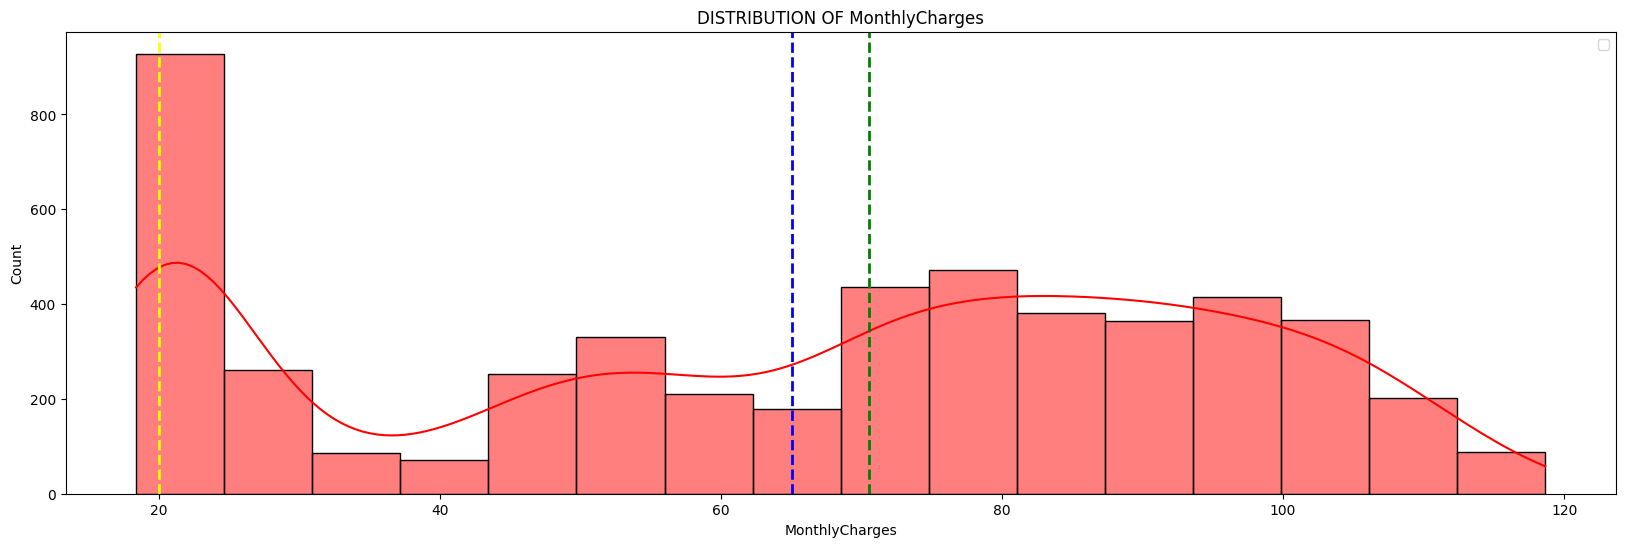

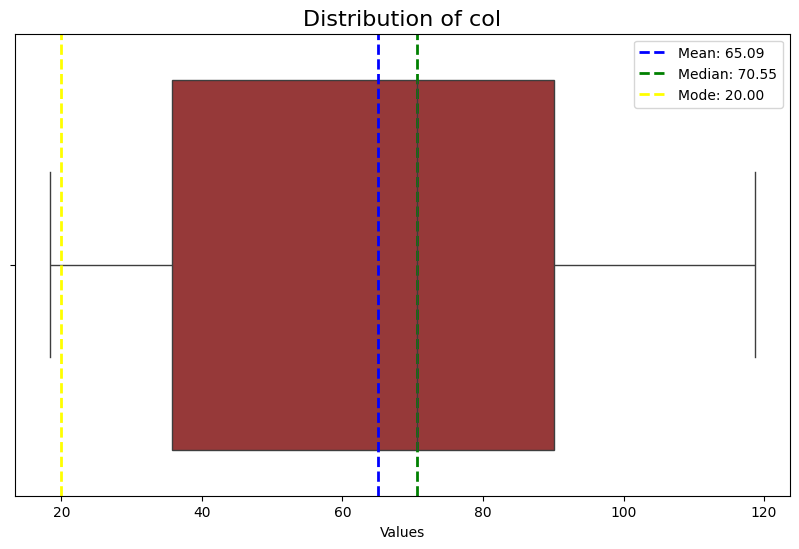

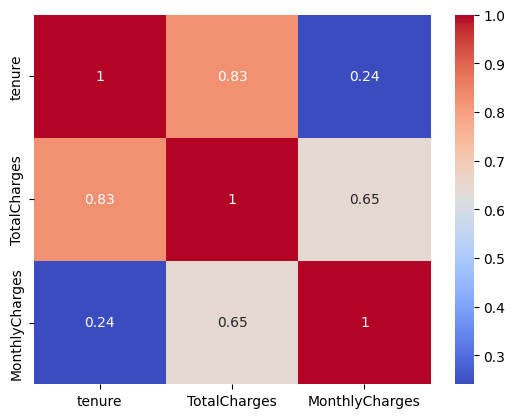

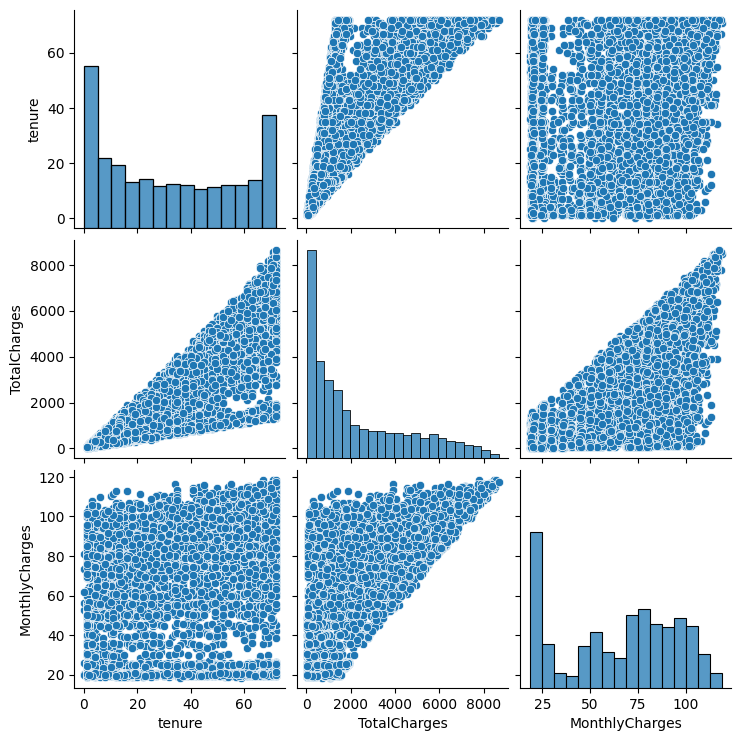

In [52]:
# CALCULATING THE STATISTIC VALUES OF NUMERIC COLUMNS
for col in numeric.columns:
    skewness = round(numeric[col].skew(),2)
    kurtosis = round(numeric[col].kurt(),2)
    mean = round(numeric[col].mean(),2)
    median = round(numeric[col].median(),2)
    mode = round(numeric[col].mode()[0],2)

# Printing the column name and its statistic values
    print(f"Column: {col}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print("-" * 40)

# UNIVARIATE ANALYSIS ON TRAIN_DATA
# set plot size

plt.figure(figsize=(20, 6))

sns.histplot(numeric[col],kde = True, color = 'red', edgecolor = 'black')
plt.axvline(mean, color='blue', linestyle='dashed', linewidth=2)
plt.axvline(median, color='green', linestyle='dashed', linewidth=2)
plt.axvline(mode, color='yellow', linestyle='dashed', linewidth=2)
plt.title(f"DISTRIBUTION OF {col}")
plt.xlabel(col)
plt.ylabel ("Count")
plt.legend()


# Create the plot
plt.figure(figsize=(10, 6))  # Set figure size
sns.boxplot(x=numeric[col], color='brown')

# Add vertical lines for mean, median, and mode
plt.axvline(mean, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
plt.axvline(mode, color='yellow', linestyle='dashed', linewidth=2, label=f'Mode: {mode:.2f}')

# Add title and labels
plt.title(f'Distribution of col', fontsize=16)
plt.xlabel('Values')

# Add legend to describe the lines
plt.legend()

# Show the plot
plt.show()

# Add Pear Correlation
sns.heatmap(numeric.corr(), annot=True, cmap='coolwarm')

# Add Pear Plot with numeric data
sns.pairplot(numeric) 




UNIVARIATE ANALYSIS ON CATEGORICAL COLUMNS

In [53]:
# DEFINING THE FUNCTION TO VISUALIZE CATEGORICAL DATA

def visual_categorical(train_data, col):
    fig, axes = plt.subplots(2, len(col), figsize=(20, 10))  # 2 rows (countplot + boxplot) instead of 3
    
    for i, column in enumerate(col):

        # Countplot
        count_ax = sns.countplot(x=train_data[column], ax=axes[0, i], color='red')
        axes[0, i].set_title(f"COUNTPLOT OF {column}")

        # Add labels to the countplot
        total = len(train_data)
        for container in count_ax.containers:
            labels = [f"{int(h.get_height())} ({(h.get_height() / total) * 100:.2f}%)" if h.get_height() > 0 else '' for h in container]
            count_ax.bar_label(container, labels=labels, label_type='edge')

        # Boxplot
        sns.boxplot(train_data[column], ax=axes[1, i], color='green')
        axes[1, i].set_title(f"BOXPLOT OF {column}")

        # Add text label for mode
        frequencies = train_data[column].mode()[0]
        axes[1, i].text(0.05, 0.9, f"Mode: {frequencies}", color='red', ha='center', va='center')


    plt.tight_layout()
    plt.show()


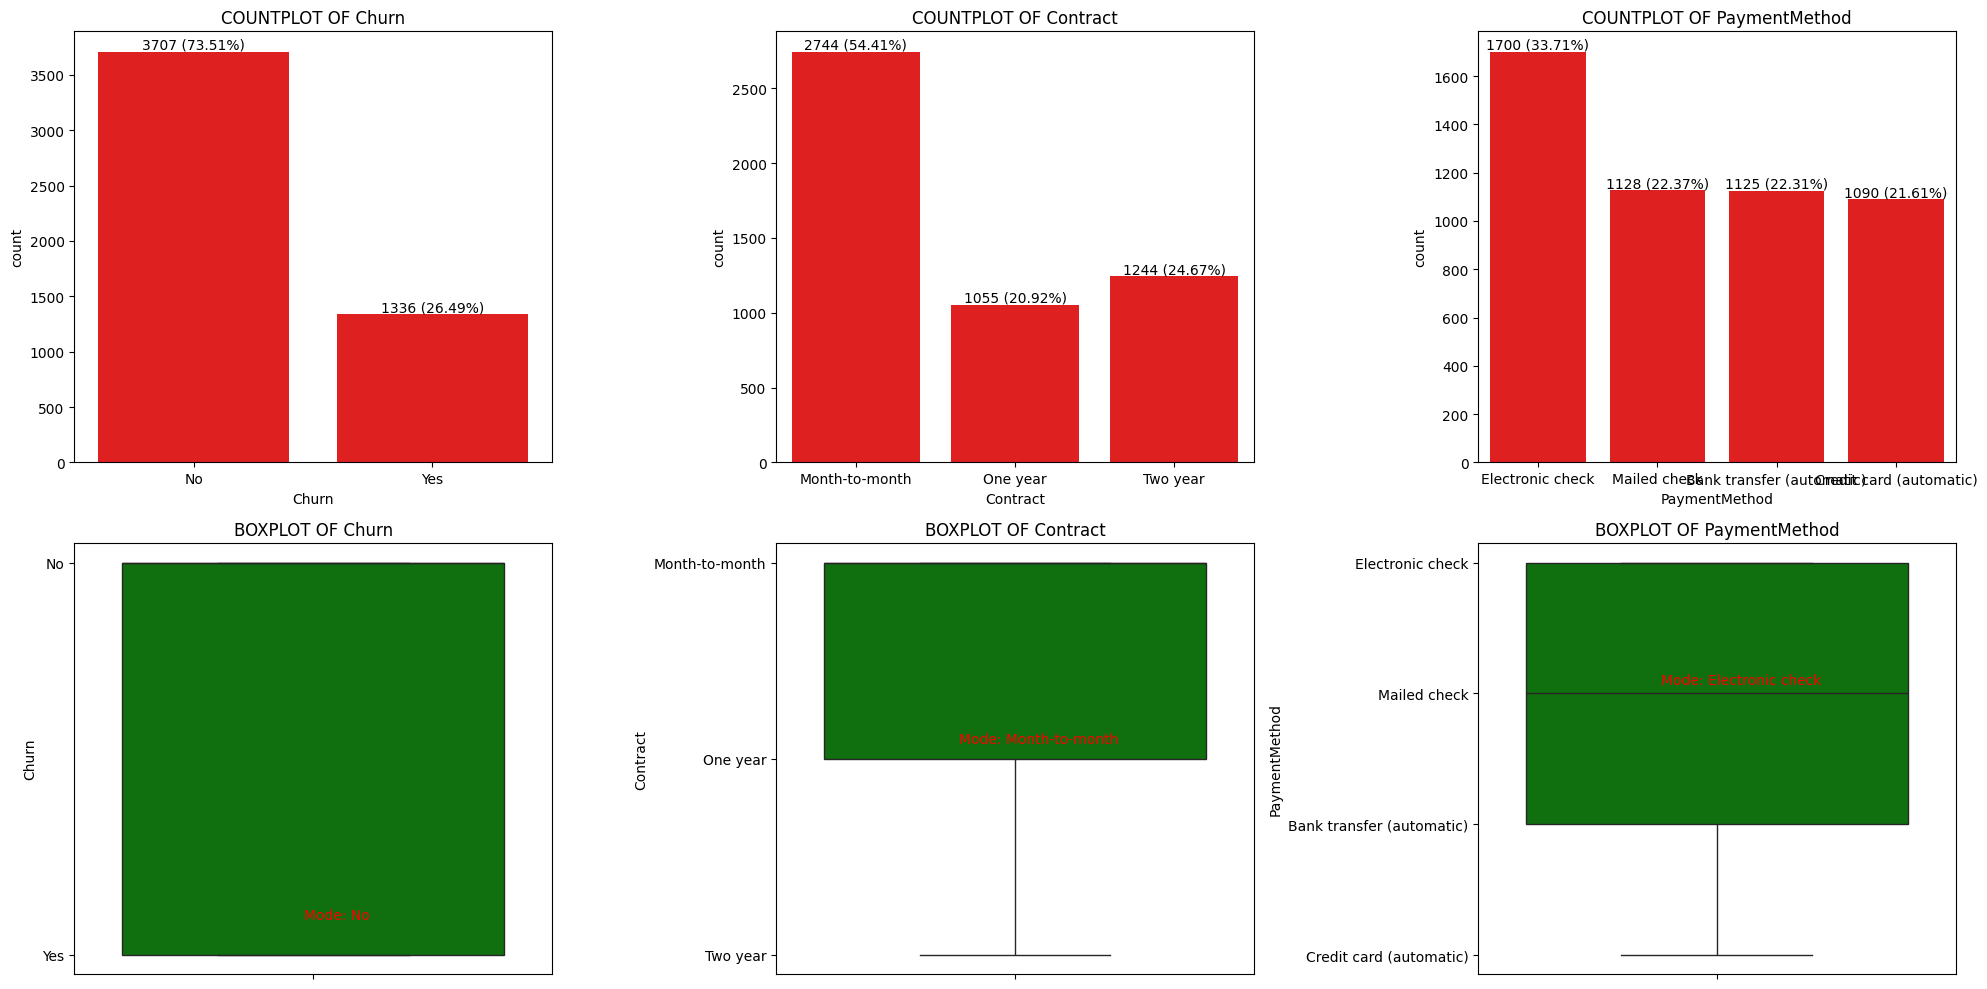

In [54]:
visual_categorical(train_data, ["Churn", "Contract", "PaymentMethod"])

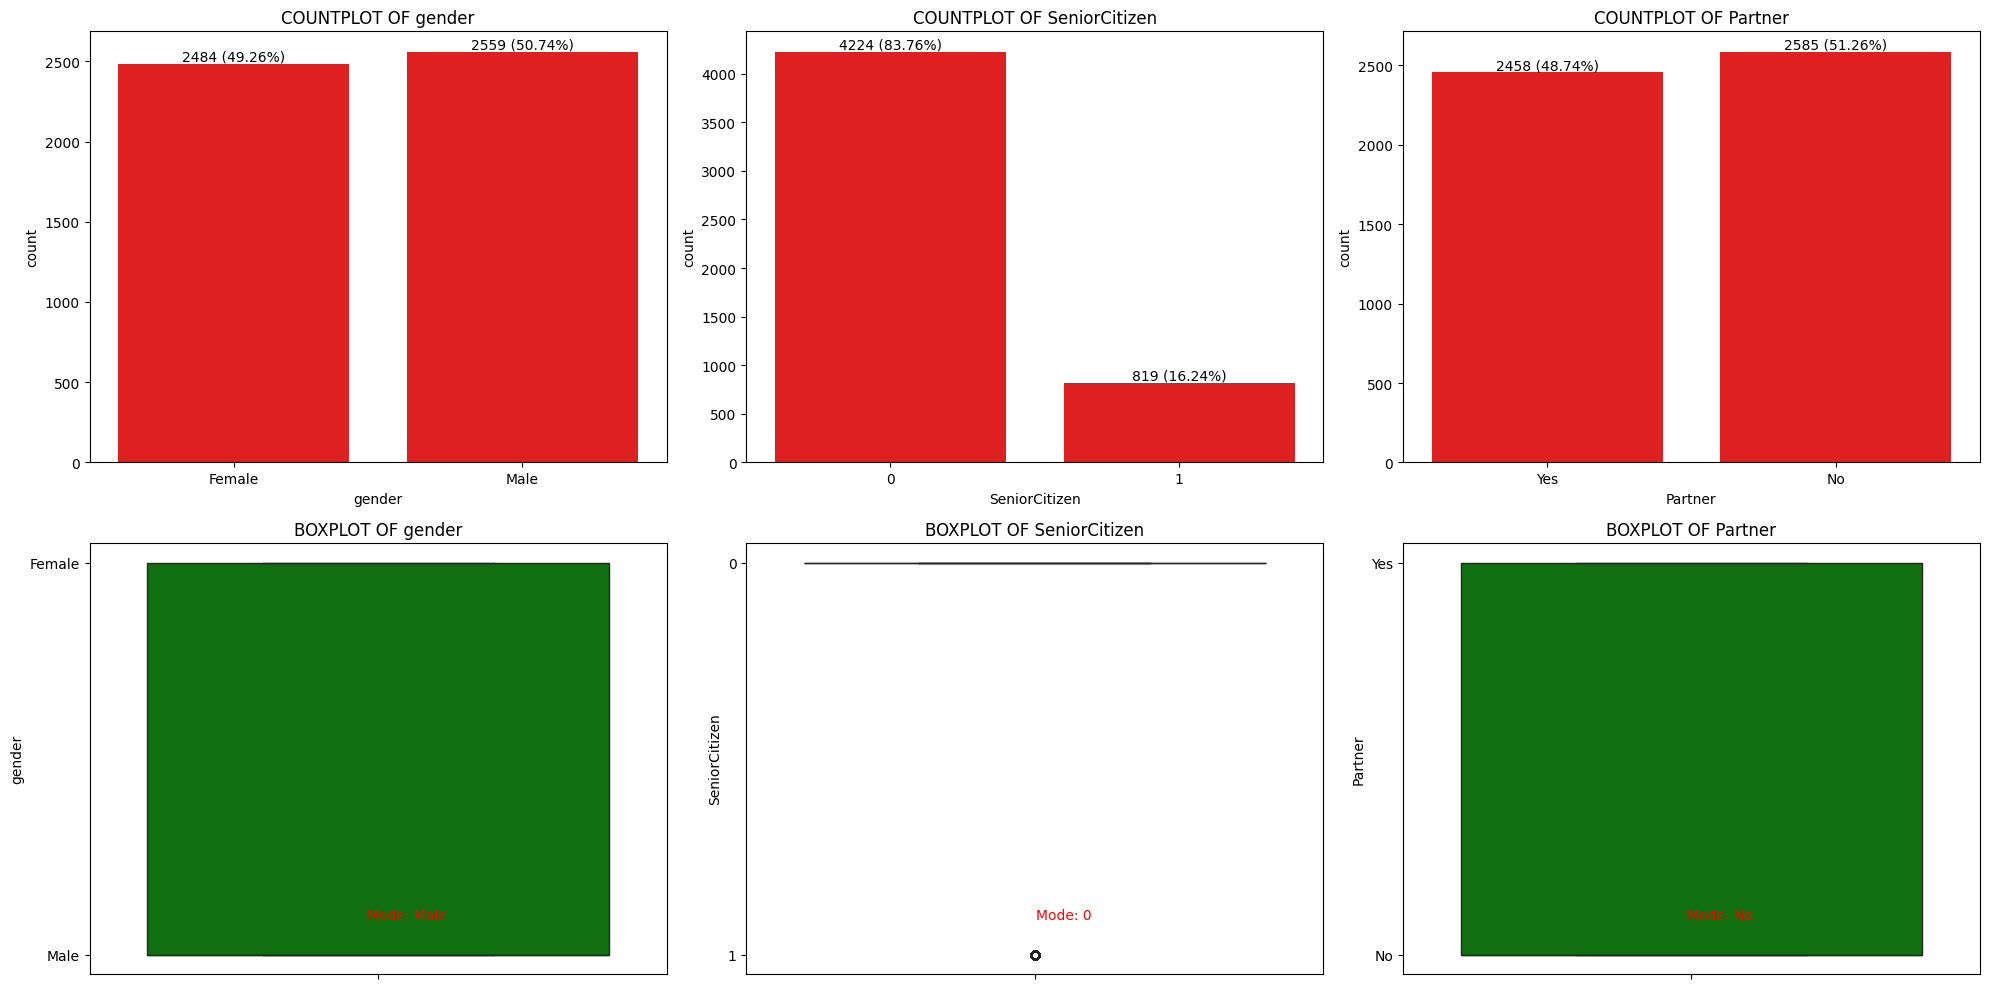

In [55]:
visual_categorical (train_data, ['gender', 'SeniorCitizen', 'Partner'])

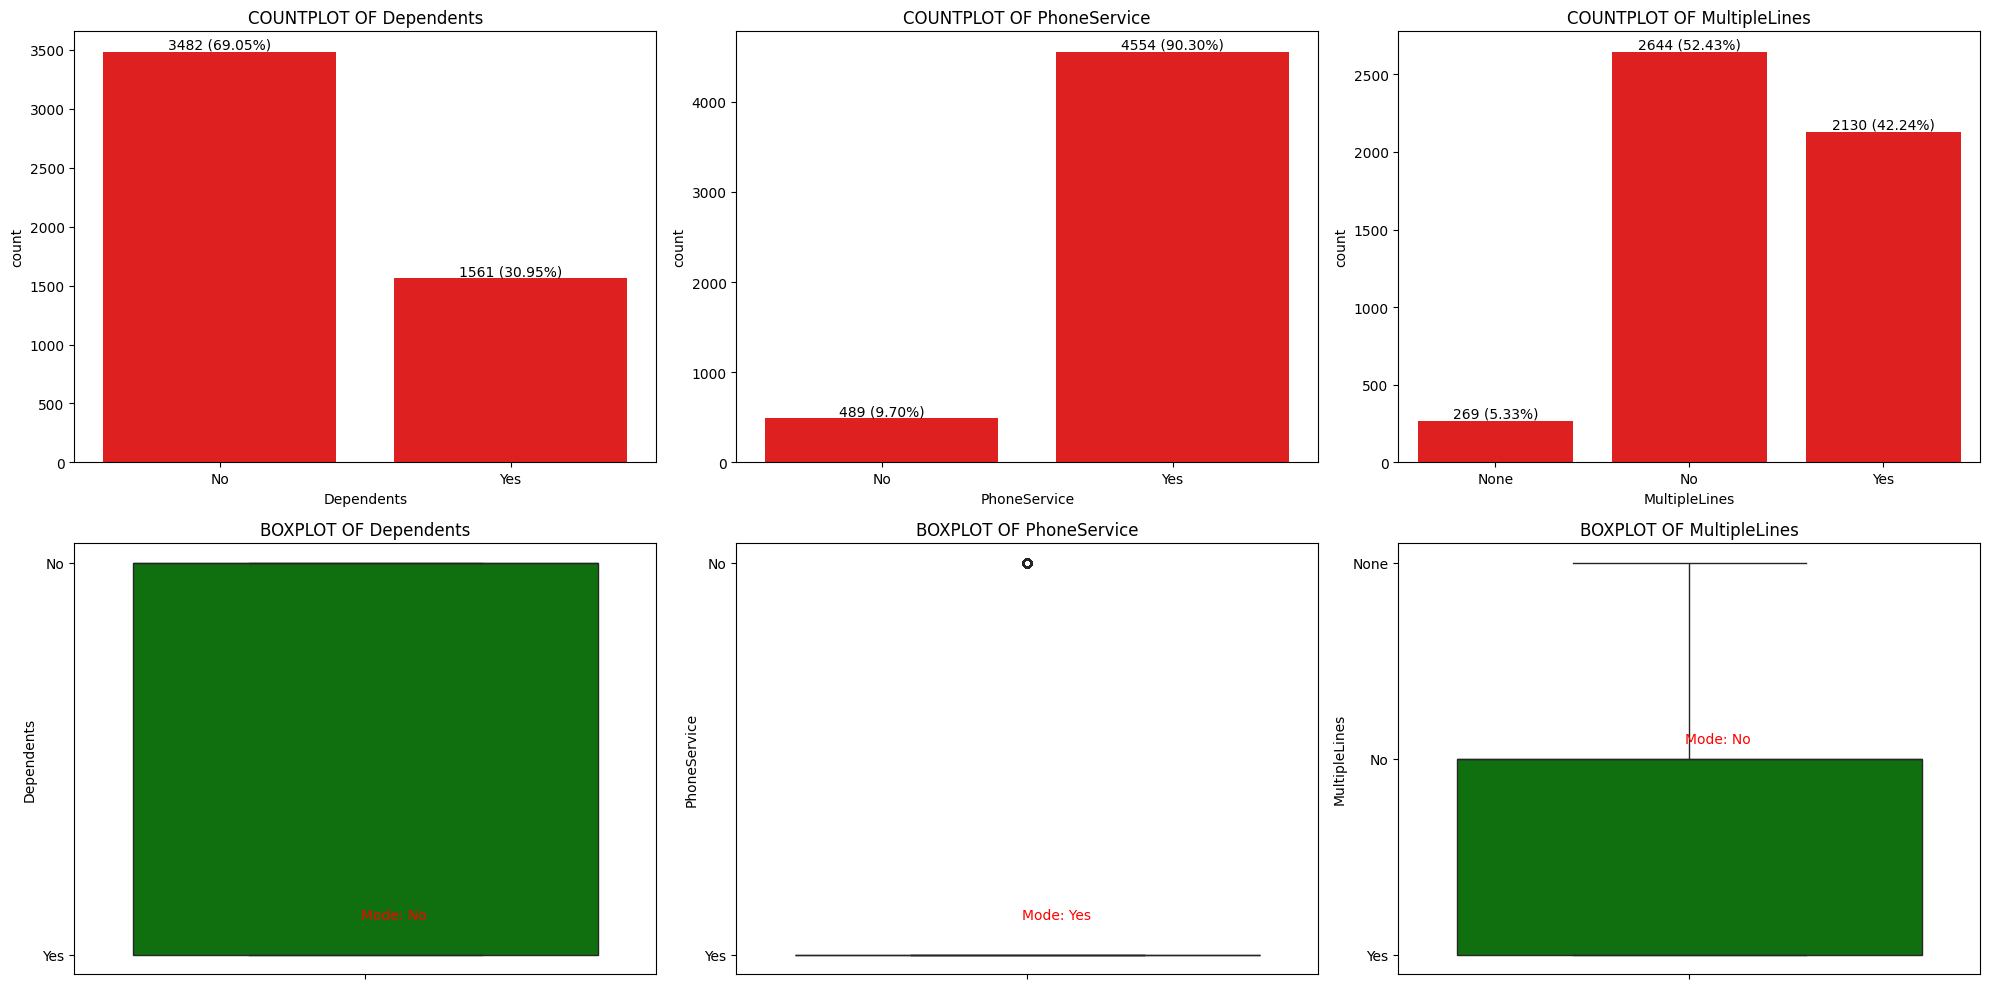

In [56]:
visual_categorical(train_data, ['Dependents', 'PhoneService','MultipleLines'])

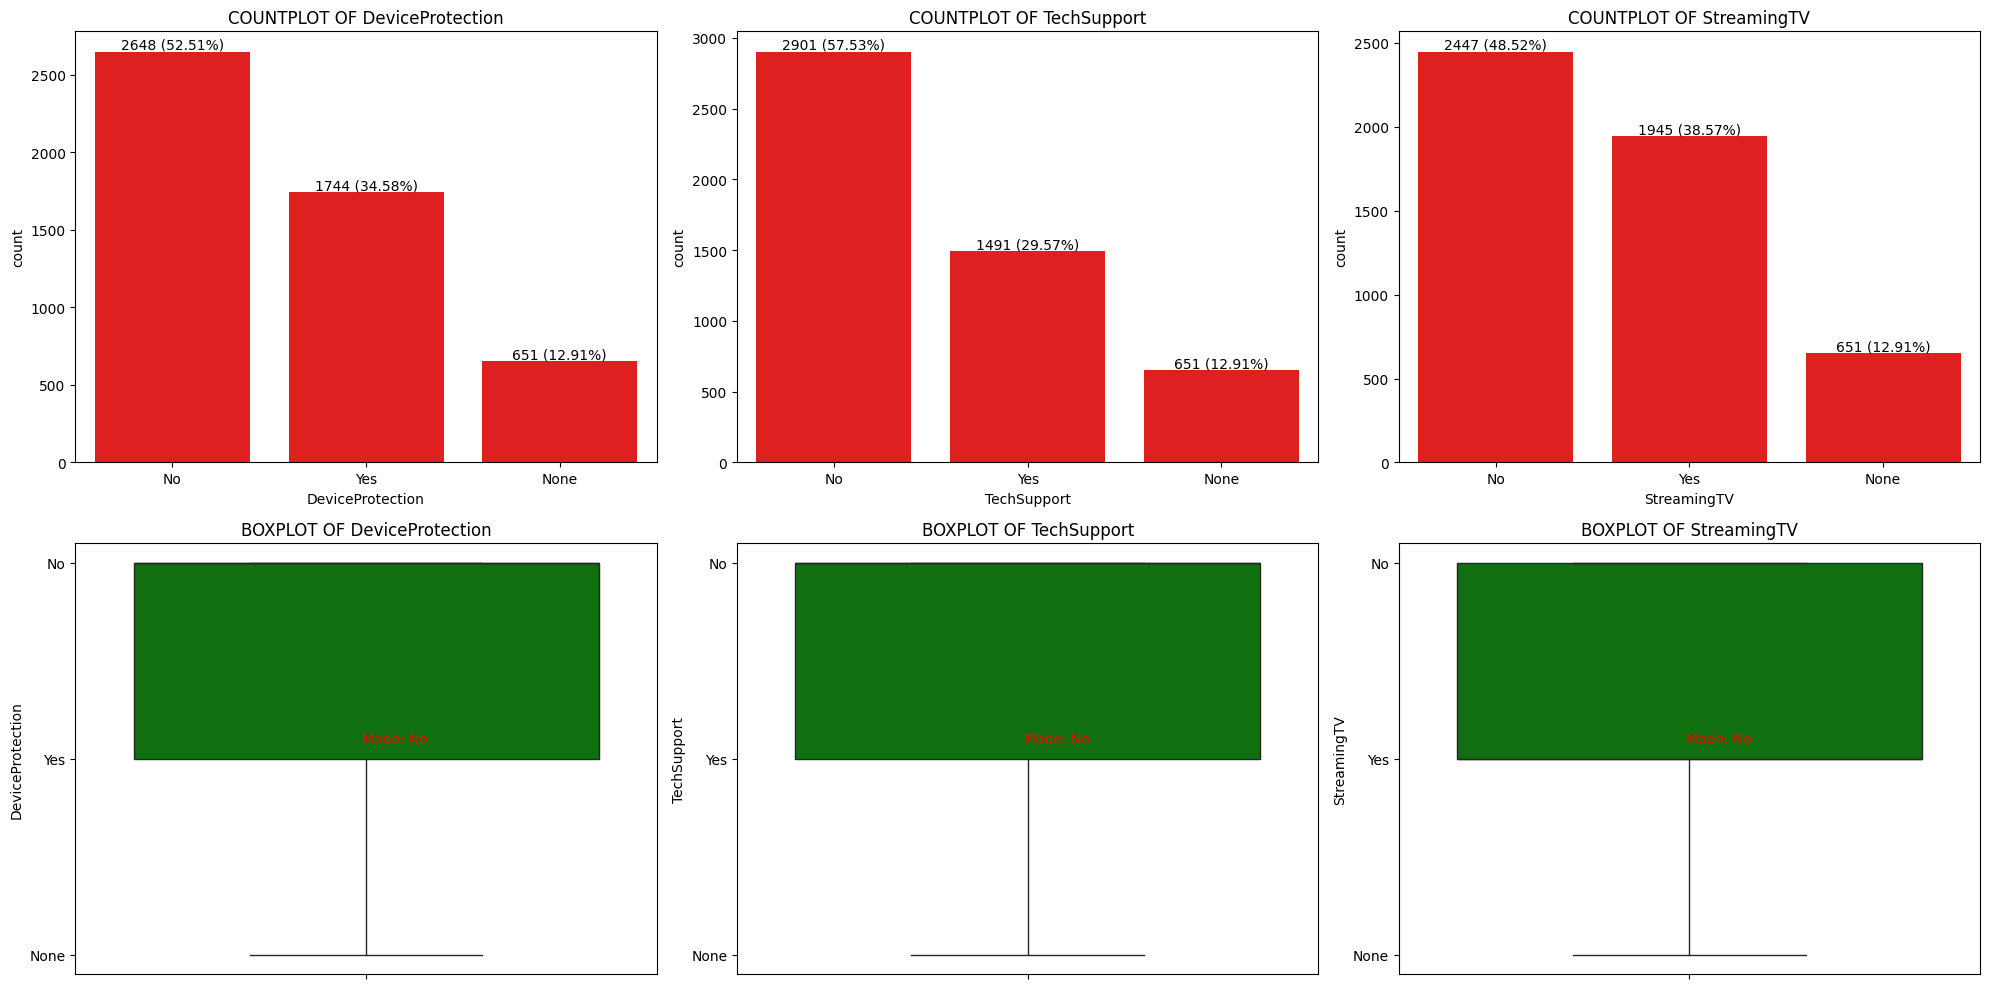

In [57]:
visual_categorical(train_data, ['DeviceProtection', 'TechSupport', 'StreamingTV'])

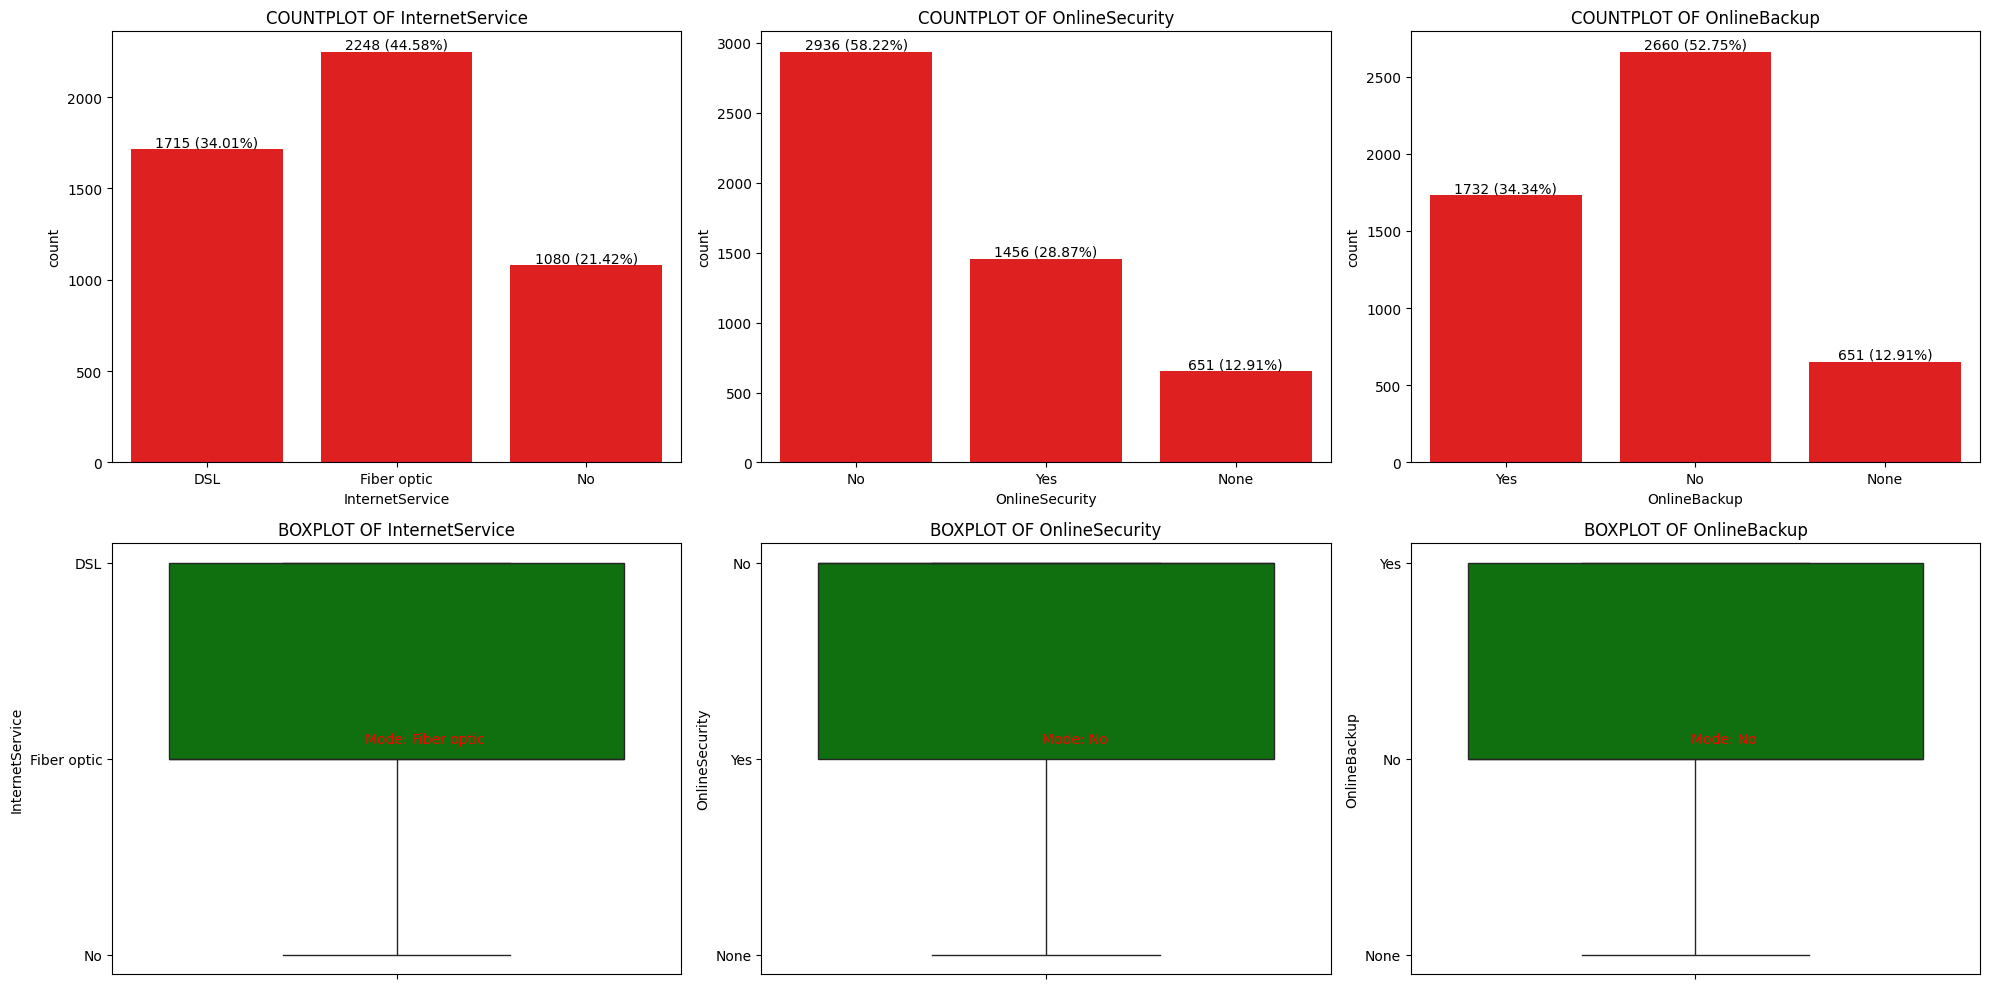

In [58]:
visual_categorical(train_data, ['InternetService', 'OnlineSecurity', 'OnlineBackup'])

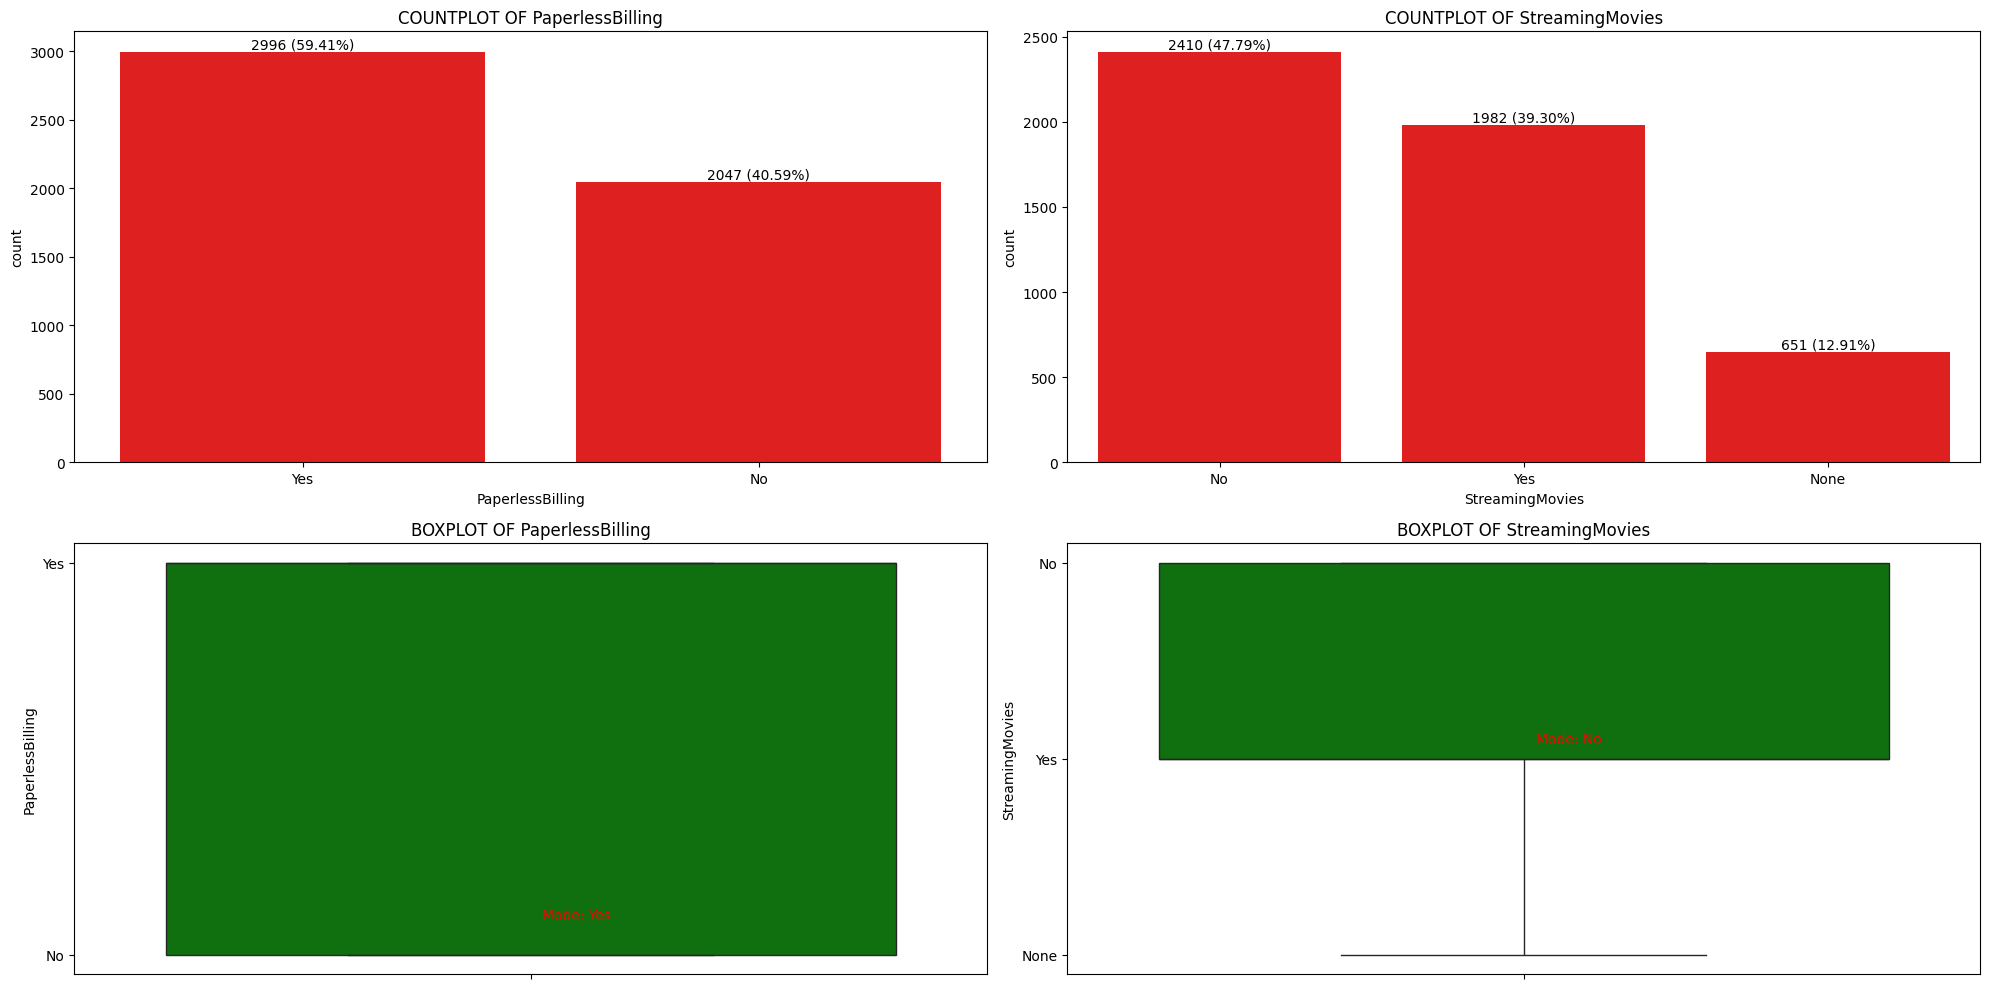

In [59]:
visual_categorical(train_data,['PaperlessBilling','StreamingMovies'])

BIVARIATE ANALYSIS ON CATEGORICAL COLUMNS

In [60]:

# List of all Categorial columns

all = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod']

In [61]:
# Checking length of all
len(all)

16

In [62]:
# Importing math for ceil function to calculate number of rows
import math

In [63]:
# Bivariate Analysis

def cat_vs_target(train_data, all,target):

    n_rows = math.ceil(len(all)/3)

    # Create a figure with n_rows rows and 3 columns
    fig, axes = plt.subplots(n_rows,3, figsize=(20, 6 * n_rows))

    # Flatten the axes array
    axes = axes.flatten()

    # Looping through all columns in 'all'
    for i, column in enumerate(all):

        # Looping through all rows
        ax = axes[i]

        # Using Countplot to visualize the data 
        sns.countplot(data=train_data, x=train_data[column], hue = target, ax=ax, color='red')

        # Adding labels
        ax.set_xlabel(column)
        ax.set_ylabel('count')
        ax.set_title(f"{column} vs {target}")
        ax.set_xticks
        ax.legend(loc='upper right', title="Churn_Status")

        total = len(train_data)
        for container in ax.containers:
            labels = [f"{int(h.get_height())} ({(h.get_height() / total) * 100:.2f}%)" if h.get_height() > 0 else '' for h in container]
            ax.bar_label(container, labels=labels, label_type='edge')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

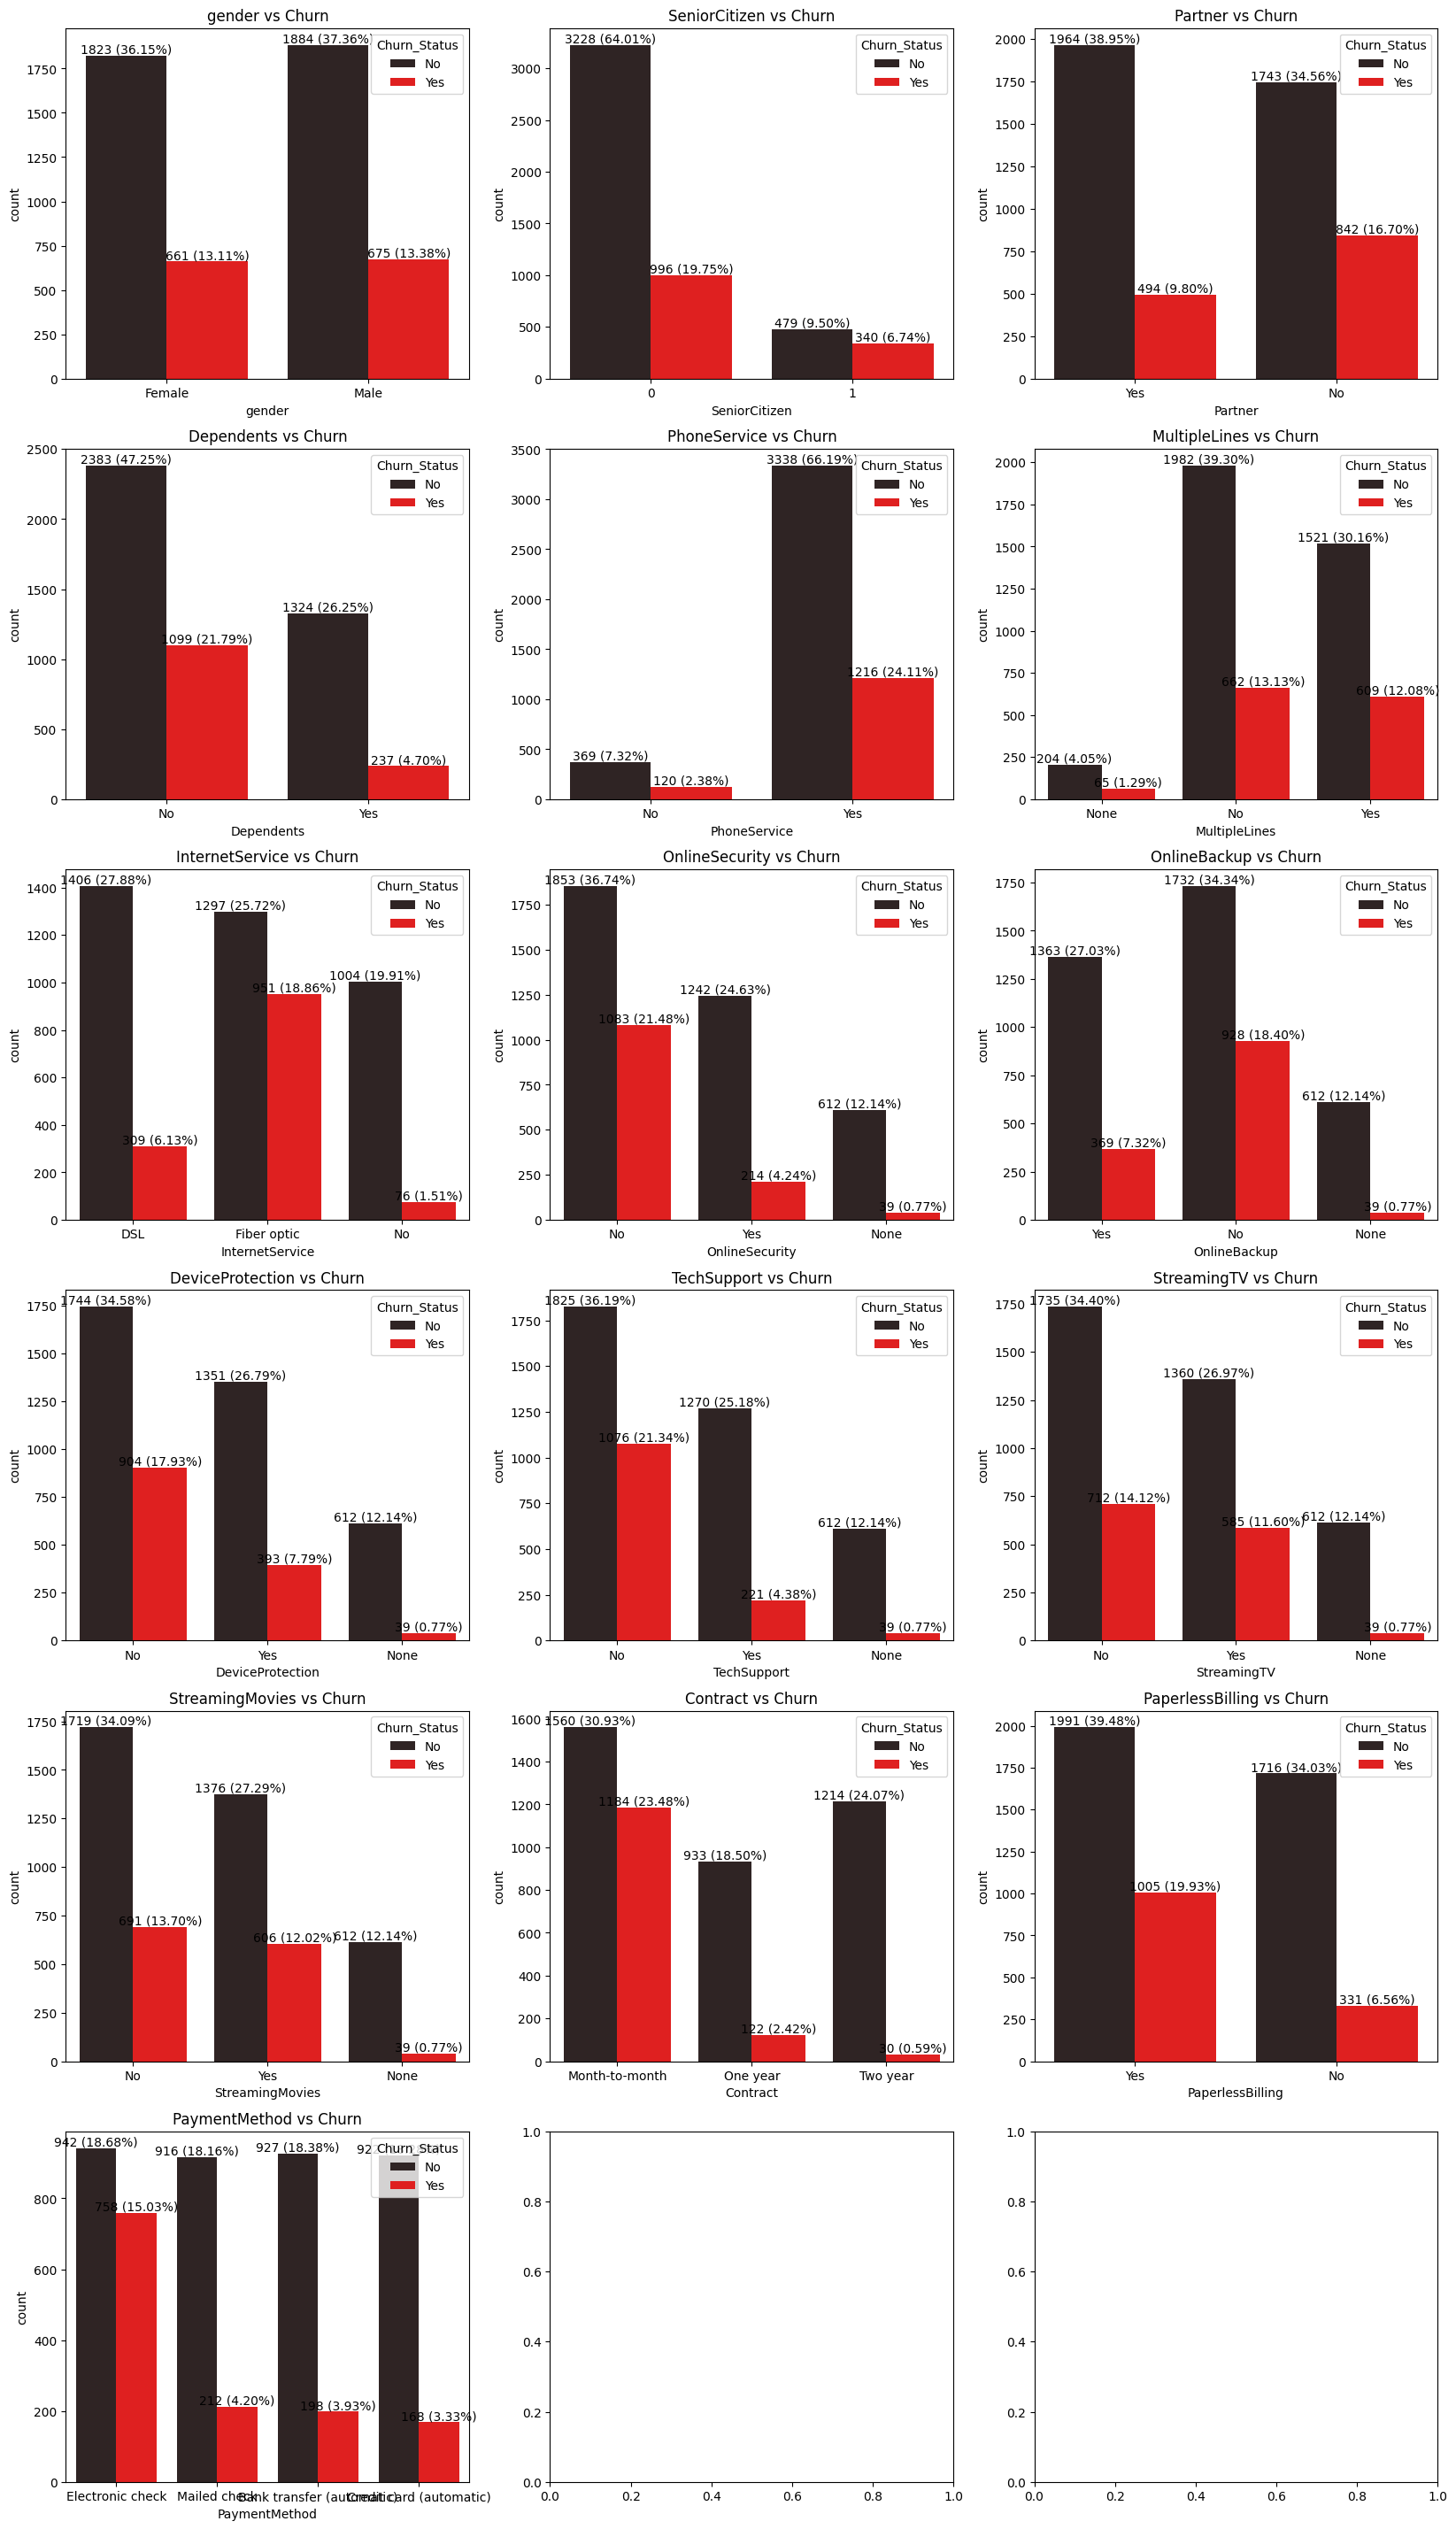

In [64]:
# Displaying Bivariate Analysis on Categorical Columns with Churn

cat_vs_target(train_data, all, "Churn")

BIVARIATE ANALYSIS ON NUMERICAL COLUMNS

In [65]:
# List of all numerical columns

num = ['tenure', 'MonthlyCharges', 'TotalCharges']


In [66]:

def num_vs_target(train_data, num, target):

    # Create a figure with n_rows rows and 3 columns
    fig, axes = plt.subplots(1, len(num), figsize=(20, 6))


    # Looping through all columns in 'num'
    for i, column in enumerate(num):

        # Looping through all rows
        ax = axes[i]

        # Using Countplot to visualize the data 
        sns.histplot(data=train_data, x=train_data[column], hue = target, bins = 30,kde = True, ax=ax, multiple= "stack", palette="dark", color='red')

        # Adding labels
        ax.set_xlabel(column)
        ax.set_ylabel('count')
        #ax.set_title(f"{column} vs {target}")
        ax.set_xticks
        ax.legend(loc='upper right', title="Churn_Status")

        # total = len(train_data)
        # for container in ax.containers:
        #     labels = [f"{int(h.get_height())} ({(h.get_height() / total) * 100:.2f}%)" if h.get_height() > 0 else '' for h in container]

plt.tight_layout()
plt.show() 
    

<Figure size 640x480 with 0 Axes>

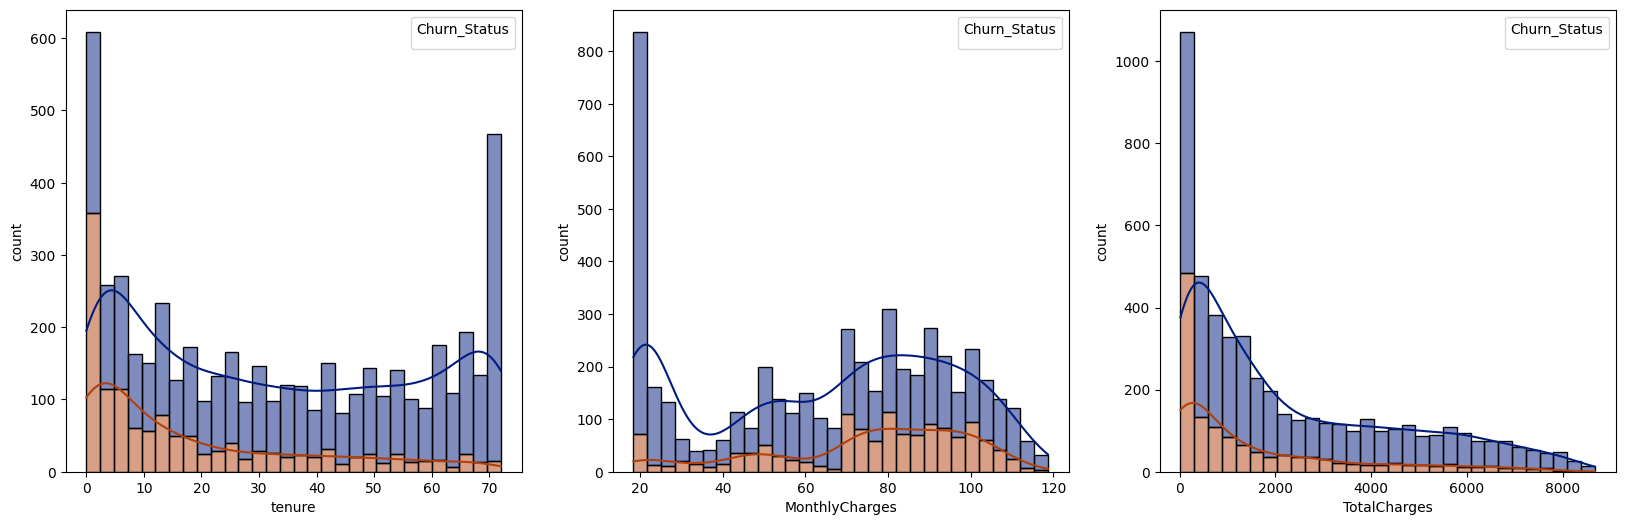

In [67]:
num_vs_target(train_data, num, "Churn") 

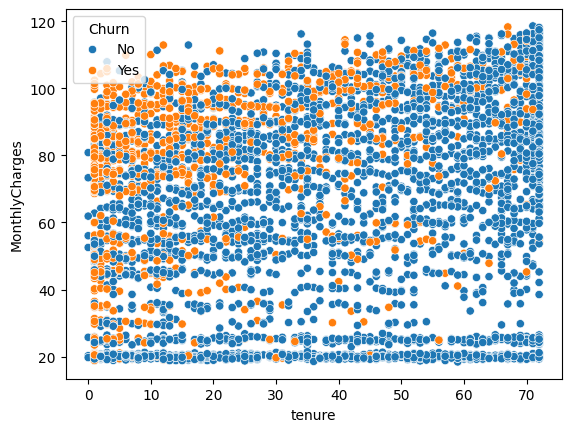

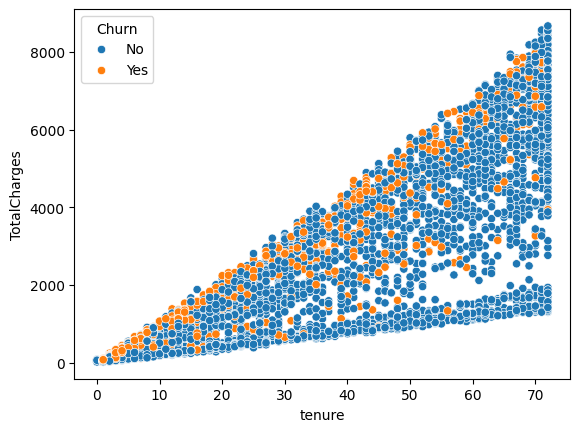

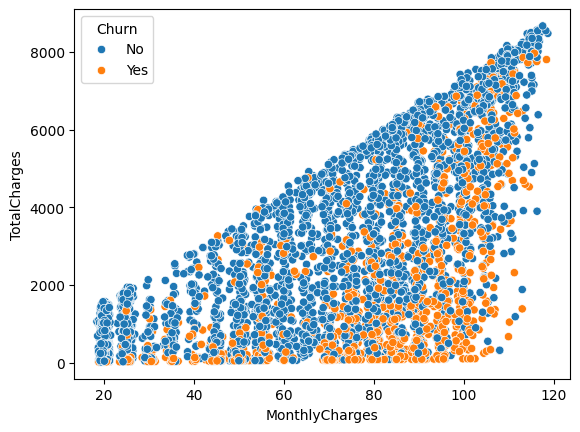

In [68]:
# Using Scatter plot to visualize the data
sns.scatterplot(x="tenure", y="MonthlyCharges", data=train_data, hue="Churn")
plt.show()

sns.scatterplot(x="tenure", y="TotalCharges", data=train_data, hue="Churn")
plt.show()

sns.scatterplot(x="MonthlyCharges", y="TotalCharges", data=train_data, hue="Churn")
plt.show()

KEY INSIGHTS AND OBERVATIONS OF BIVARIATE ANALYSIS

In [69]:
#MULIVARIATE ANALYSIS
# CORRELATION USING HEATMAP

In [70]:
correlation = numeric.corr()
correlation

,tenure,TotalCharges,MonthlyCharges
tenure,1.000000,0.826264,0.240645
TotalCharges,0.826264,1.000000,0.647007
MonthlyCharges,0.240645,0.647007,1.000000


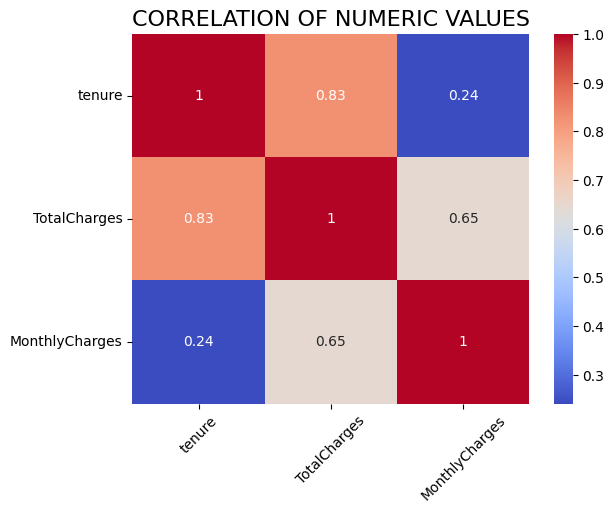

In [71]:
# Ploting Correlation Heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title(f'CORRELATION OF NUMERIC VALUES', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


In [72]:
# HYPOTHESIS TESTING

# Null Hypothesis (H₀):
# There is no significant relationship between the type of internet service (InternetService) and customer churn (Churn).

# Alternative Hypothesis (H₁):
# There is a significant relationship between the type of internet service (InternetService) and customer churn (Churn).


In [73]:
# USING CHI-SQUARE TEST

# importing the chi2_contingency

from scipy.stats import chi2_contingency



In [74]:
print(train_data.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [75]:
len(train_data.columns)

20

In [76]:
contigency_table = pd.crosstab(train_data['InternetService'], train_data['Churn'])
contigency_table

# chi2, p, dof, ex = chi2_contingency(contigency_table)

# print(f"chi2 = {chi2}\np = {p}\ndof = {dof}\nexpected values = {ex}")


Churn,No,Yes
InternetService,,
DSL,1406,309
Fiber optic,1297,951
No,1004,76


In [77]:
# # List of all numerical columns 
# internetservice = train_data.loc[train_data["Churn"] == "None"]
# print(internetservice)

In [78]:
# train_data.loc[2988, "Churn"] = "No"

In [79]:
# print(internetservice)

In [80]:
import scipy.stats as stats

# Assuming you have a dataframe 'df' with columns 'InternetService' and 'Churn'
contingency_table = pd.crosstab(train_data['InternetService'], train_data['Churn'])

# Chi-Square Test of Independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Output the results
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")

if p < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between InternetService and Churn")
else:
    print("Fail to reject the null hypothesis: No significant relationship between InternetService and Churn")


Chi-square statistic: 561.7822685229834
p-value: 1.0245434346853363e-122
Reject the null hypothesis: There is a significant relationship between InternetService and Churn


In [81]:
# Decision-making based on p-value
p_value = 1.0245434346853363e-122  # your computed p-value
alpha = 0.05  # significance level

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between InternetService and Churn")
else:
    print("Fail to reject the null hypothesis: No significant relationship between InternetService and Churn")


Reject the null hypothesis: There is a significant relationship between InternetService and Churn


In [82]:
# method 2 - using scipy.stats.mannwhitneyu

churned = train_data[train_data["Churn"] == "Yes"]["InternetService"].value_counts()

not_churned = train_data[train_data["Churn"] == "No"]["InternetService"].value_counts()

In [83]:
print(churned)

InternetService
Fiber optic    951
DSL            309
No              76
Name: count, dtype: int64


In [84]:
print(not_churned)

InternetService
DSL            1406
Fiber optic    1297
No             1004
Name: count, dtype: int64


In [85]:
#importing our test function

from scipy.stats import mannwhitneyu
u_stat, p = mannwhitneyu(churned, not_churned)
print(f"u_stat = {u_stat}\np = {p}")

u_stat = 0.0
p = 0.1


In [86]:
# Deciding whether to accept or reject the null hypothesis
alpha = 0.05

if p < 0.05:

    print("Reject the null hypothesis")
else:

    print("Accept the null hypothesis")

Accept the null hypothesis


In [87]:
# 3rd method to confirm the hypothesis
from scipy.stats import ttest_ind
t_stat, p = ttest_ind(churned, not_churned)
print(f"t_stat = {t_stat}\np = {p}")

t_stat = -2.7456661860626608
p = 0.0516038194905381


In [88]:
alpha = 0.05

if p < 0.05:

    print("Reject the null hypothesis")
else:

    print("Accept the null hypothesis")

Accept the null hypothesis


ANSWERING BUSINESS ANALYTICS QUESTION USING VISUALS

# Business Question 1: Are Monthly charges, Total Charges and Tenure key factors driving customer churn?

In [ ]:
# USING HISTOGRAMS TO VISUALIZE THE FACTORS DRIVING CUSTOMER CHURN BASED ON NUMERICAL COLUMNS

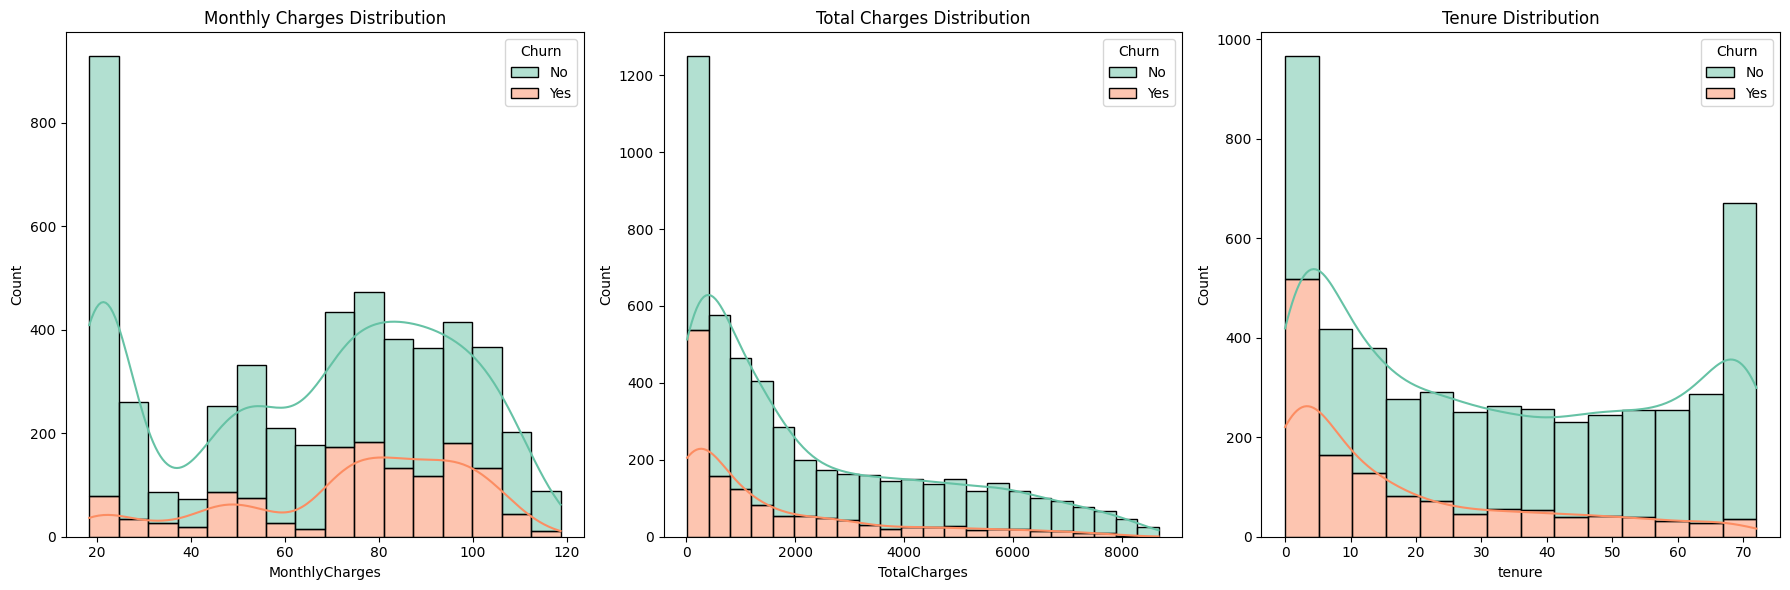

In [111]:

# Plotting histograms for each variable separately using subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Create a 1x3 grid of subplots

# Check if axes is a single Axes object or a list of Axes
if not isinstance(axes, np.ndarray):
    axes = [axes]  # Convert to list if it's a single object

# Histogram for 'MonthlyCharges'
sns.histplot(data=train_data, x='MonthlyCharges', hue='Churn', multiple='stack', palette='Set2', kde=True, ax=axes[0])
axes[0].set_title('Monthly Charges Distribution')

# Histogram for 'TotalCharges'
sns.histplot(data=train_data, x='TotalCharges', hue='Churn', multiple='stack', palette='Set2', kde=True, ax=axes[1])
axes[1].set_title('Total Charges Distribution')

# Histogram for 'tenure'
sns.histplot(data=train_data, x='tenure', hue='Churn', multiple='stack', palette='Set2', kde=True, ax=axes[2])
axes[2].set_title('Tenure Distribution')

# Show the plots
plt.tight_layout()
plt.show()


ANALYSIS :
This diagram consists of three histograms that represent the distribution of different numerical features in relation to customer churn (`Yes` or `No`):

1. Monthly Charges Distribution (Left)**
-   The x-axis represents `MonthlyCharges` (the monthly fee a customer pays).
-   The green bars represent customers who did not churn, while the orange bars represent customers who churned.
    Observations: 
-   A large portion of customers with low monthly charges (below 30) did not churn.
-   As monthly charges increase, churn appears to be more frequent, especially between 70 and 90 units.

2. **Total Charges Distribution (Middle)**
   - The x-axis represents `TotalCharges` (the total amount a customer has paid to the company).
   - Green and orange bars show the non-churned and churned customers, respectively.
   - Observations: 
     - Customers with lower total charges (likely newer customers) show a higher tendency to churn.
     - As total charges increase, the likelihood of churn decreases significantly.

3. **Tenure Distribution (Right)**
   - The x-axis represents `tenure` (how long a customer has been with the company, in months).
   - Green and orange bars depict non-churned and churned customers, respectively.
   - Observations:
     - Customers with low tenure (less than 10 months) show higher churn rates.
     - As tenure increases, churn decreases dramatically, indicating that longer-tenured customers are more likely to stay.

In summary, churn appears to be higher among customers with shorter tenures, lower total charges, and, in some cases, higher monthly charges.

**BUSINESS QUESTION 2: Does the contract type impact the likelihood of churn?**

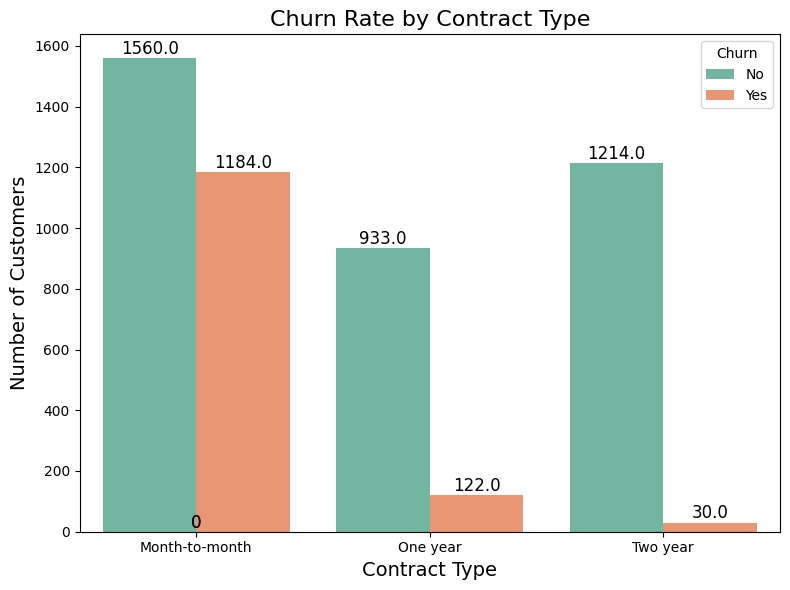

In [118]:
# Bar plot for contract type and churn
plt.figure(figsize=(8, 6))
plot = sns.countplot(data=train_data, x='Contract', hue='Churn', palette='Set2')

# Adding title and axis labels
plt.title('Churn Rate by Contract Type', fontsize=16)
plt.xlabel('Contract Type', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)

# Adding labels to each bar
for p in plot.patches:
    height = p.get_height()
    plot.annotate(f'{height}', 
                  (p.get_x() + p.get_width() / 2., height), 
                  ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 3), 
                  textcoords='offset points')

# Display the plot
plt.tight_layout()
plt.show()


### Analysis of the Churn Rate by Contract Type:

1. Month-to-Month Contracts:
   - The highest churn rate is observed among customers with **month-to-month contracts**.
   - Out of 2,744 customers on month-to-month contracts, **1,184 customers churned** (around 43.1%), while **1,560 stayed**.
   - This suggests that month-to-month customers have more flexibility and are more likely to leave.

2. One-Year Contracts:
   - For customers with **one-year contracts**, the churn rate is significantly lower.
   - Out of 1,055 customers on one-year contracts, **only 122 churned** (around 11.6%), while **933 remained**.
   - This indicates that longer-term contracts reduce churn since customers are more committed.

3. Two-Year Contracts:
   - The **two-year contract** customers have the lowest churn rate.
   - Out of 1,244 customers on two-year contracts, only **30 churned** (around 2.4%), while **1,214 stayed**.
   - This confirms that customers with longer commitments tend to stay with the service.

Conclusion:
- **Contract type significantly impacts churn rates**, with **month-to-month contracts** having the highest churn, while **one-year and two-year contracts** show much lower churn rates.
- Encouraging longer-term contracts could help reduce customer churn.

Business Question 3: How does customer tenure affect the probability of churn?

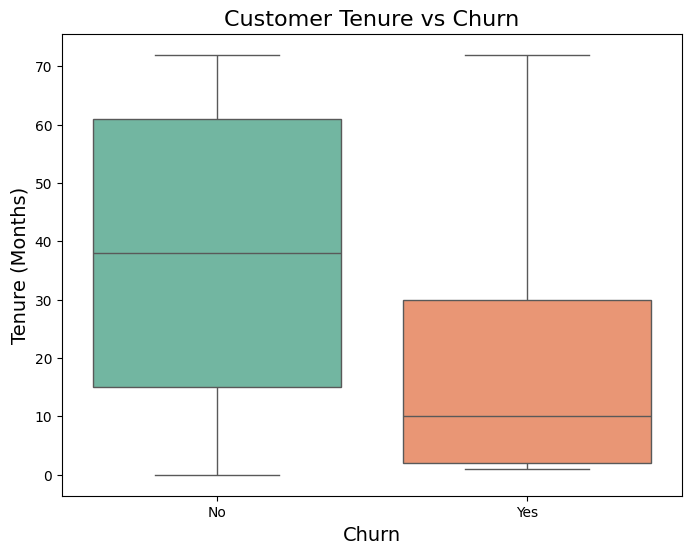

In [119]:

# Box plot to visualize tenure against churn
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_data, x='Churn', y='tenure', palette='Set2')

# Adding title and labels
plt.title('Customer Tenure vs Churn', fontsize=16)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Tenure (Months)', fontsize=14)

plt.show()


The box plot above shows the relationship between **customer tenure** (in months) and **churn**.

### Key Observations:
1. **Non-Churned Customers (No):**
   - The median tenure for non-churned customers is around **40 months**.
   - The tenure distribution is spread across a wider range, with many non-churned customers having tenure up to **70 months**.
   - This suggests that customers who stay longer are less likely to churn. In other words, **longer tenure correlates with customer retention**.

2. **Churned Customers (Yes):**
   - The median tenure for churned customers is much lower, at around **10 months**.
   - The box plot shows a more concentrated range of tenure, indicating that most churned customers left relatively early, within the first **20 months**.
   - This suggests that customers with **shorter tenure are more likely to churn**. Early-stage customers are at a higher risk of leaving.

### Analysis:
- **Tenure significantly impacts churn**. Customers who have been with the company for a shorter time tend to churn more frequently, while customers with longer tenure are more loyal.
- The business implication here is that focusing on improving customer satisfaction and retention strategies within the first **10 to 20 months** could reduce churn significantly. Strategies like onboarding improvements, loyalty programs, or better customer support could help extend customer tenure, reducing churn in the early stages.

Business Question 4: Are high-paying customers more likely to churn?

In [120]:
# Calculating the 75th percentile of MonthlyCharges to filter high-paying customers
high_paying_threshold = train_data['MonthlyCharges'].quantile(0.75)

# Filtering the high-paying customers
high_paying_customers = train_data[train_data['MonthlyCharges'] >= high_paying_threshold]

#Calculating churn rate for high-paying customers
churn_rate_high_paying = high_paying_customers['Churn'].value_counts(normalize=True) * 100

# Output the results
print(f"High-paying customer threshold: {high_paying_threshold}")
print("Churn rates for high-paying customers:")
print(churn_rate_high_paying)


High-paying customer threshold: 90.05000305175781
Churn rates for high-paying customers:
Churn
No     66.402536
Yes    33.597464
Name: proportion, dtype: float64


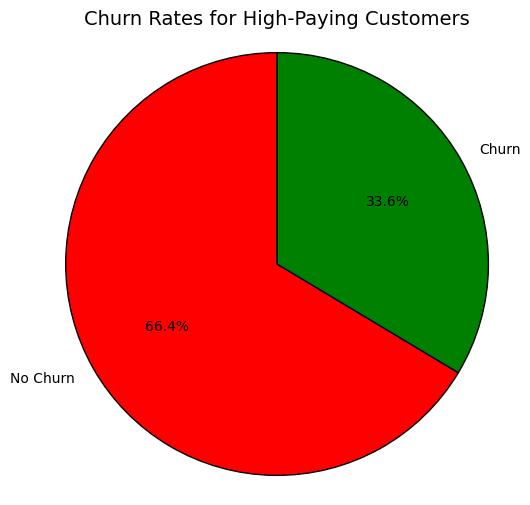

In [128]:

# Data for high-paying customer churn rates
labels = ['No Churn', 'Churn']
sizes = [66.402536, 33.597464]
colors = ['red', 'green']
explode = (0, 0.1)

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Churn Rates for High-Paying Customers', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the chart
plt.show()


Analysis


The pie chart visually displays the churn rates for high-paying customers, with the following proportions:

No Churn: 66.4% (represented by the blue segment)
Churn: 33.6% (represented by the pink segment)
This indicates that 33.6% of high-paying customers are likely to churn, while the majority, 66.4%, remain loyal. ​

DATA PREPARATION


In [94]:
#SPLITTING THE TRAINING DATA INTO TRAINING AND VALIDATION SETS
# SPILT TRAIN_DATA

from sklearn.model_selection import train_test_split

X = train_data.drop("Churn", axis=1)
y = train_data["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
#checking the shape of train and test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4034, 19)
(1009, 19)
(4034,)
(1009,)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier  # Example model
from sklearn.metrics import accuracy_score
# Define the OneHotEncoder
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

# Apply the encoder only to the categorical columns using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', onehot_encoder, categorical_columns)], 
    remainder='passthrough'  # Keep other columns unchanged
)

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocess the categorical columns
    ('classifier', RandomForestClassifier(random_state=42))  # RandomForestClassifier as the model
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


In [96]:
# # Encoding Categorical Variables as dummy variables using OneHotEncoder
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer


In [97]:

# # Assume you have a DataFrame 'df' with categorical columns that need encoding
# # and 'target_column' is your target variable
# X = train_data.drop('Churn', axis=1)  # Features
# y = train_data['Churn']  # Target

In [98]:
# # List of categorical columns to encode
# categorical_columns = ['InternetService', 'Contract', 
#                        'PaymentMethod', 'gender', 
#                        'Partner', 'Dependents', 'PhoneService',
#                          'MultipleLines', 'OnlineSecurity', 
#                          'OnlineBackup', 'DeviceProtection',
#                            'TechSupport', 'StreamingTV', 'StreamingMovies',
#                              'SeniorCitizen', 'tenure', 'PaperlessBilling',
#                                'MonthlyCharges', 'TotalCharges']
